<h1 style="color:red">Import data from mongo</h1>

In [4]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))

In [5]:
del data['_id']
data.head(22)

,daysInTheater,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,query,retweets,tweets
0,3,2.591795,707021.0,1,0.002675,0.004338,0.054505,0.053073,#PricelessTheMovie,511,975
1,3,1.845403,24710273.0,0,0.009766,0.014776,0.036671,0.040417,#TheAccountant,10957,16708
2,3,2.371755,28501448.0,0,0.009082,0.015891,0.018030,0.032273,#MadeaHalloween,9847,12710
3,3,2.181918,22872490.0,1,0.003739,0.006961,0.059013,0.034859,#JackReacherMovie,8783,10032
4,3,2.458964,11767210.0,0,0.015363,0.015290,0.014551,0.026469,#KevinHartWhatNow,14787,18045
5,3,0.810219,2182216.0,0,0.029692,0.014055,0.026842,0.018494,#MaxSteel,1301,1781
6,3,0.787846,14065500.0,1,0.010604,0.008255,0.023187,0.020197,#OuijaMovie,12413,29983
7,3,2.365276,5461475.0,0,0.010428,0.012843,0.019997,0.019704,#KeepingUpWithTheJoneses,2638,3882
8,3,1.984609,46581142.0,0,0.001130,0.001138,0.038407,0.072036,#DreamWorksTrolls,12690,22481
9,3,1.949662,15190758.0,0,0.008849,0.010506,0.046558,0.050262,#HacksawRidge,10091,14780


<h1 style="color:blue">Make table readable</h1>

In [6]:
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets
0,#PricelessTheMovie,975,511,3,2.591795,707021.0,1,0.002675,0.004338,0.054505,0.053073
1,#TheAccountant,16708,10957,3,1.845403,24710273.0,0,0.009766,0.014776,0.036671,0.040417
2,#MadeaHalloween,12710,9847,3,2.371755,28501448.0,0,0.009082,0.015891,0.018030,0.032273
3,#JackReacherMovie,10032,8783,3,2.181918,22872490.0,1,0.003739,0.006961,0.059013,0.034859
4,#KevinHartWhatNow,18045,14787,3,2.458964,11767210.0,0,0.015363,0.015290,0.014551,0.026469
5,#MaxSteel,1781,1301,3,0.810219,2182216.0,0,0.029692,0.014055,0.026842,0.018494
6,#OuijaMovie,29983,12413,3,0.787846,14065500.0,1,0.010604,0.008255,0.023187,0.020197
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,5461475.0,0,0.010428,0.012843,0.019997,0.019704
8,#DreamWorksTrolls,22481,12690,3,1.984609,46581142.0,0,0.001130,0.001138,0.038407,0.072036
9,#HacksawRidge,14780,10091,3,1.949662,15190758.0,0,0.008849,0.010506,0.046558,0.050262


In [7]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(10, 'gross', gross)
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross
0,#PricelessTheMovie,975,511,3,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0
1,#TheAccountant,16708,10957,3,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0
2,#MadeaHalloween,12710,9847,3,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0
3,#JackReacherMovie,10032,8783,3,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0
4,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0
5,#MaxSteel,1781,1301,3,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0
6,#OuijaMovie,29983,12413,3,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0
8,#DreamWorksTrolls,22481,12690,3,1.984609,0,0.001130,0.001138,0.038407,0.072036,46581142.0
9,#HacksawRidge,14780,10091,3,1.949662,0,0.008849,0.010506,0.046558,0.050262,15190758.0


In [8]:
data['grossPerDay'] = data.gross/data.daysInTheater
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay
0,#PricelessTheMovie,975,511,3,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05
1,#TheAccountant,16708,10957,3,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06
2,#MadeaHalloween,12710,9847,3,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06
3,#JackReacherMovie,10032,8783,3,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06
4,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06
5,#MaxSteel,1781,1301,3,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05
6,#OuijaMovie,29983,12413,3,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06
8,#DreamWorksTrolls,22481,12690,3,1.984609,0,0.001130,0.001138,0.038407,0.072036,46581142.0,1.552705e+07
9,#HacksawRidge,14780,10091,3,1.949662,0,0.008849,0.010506,0.046558,0.050262,15190758.0,5.063586e+06


<h2>Plotting</h2>

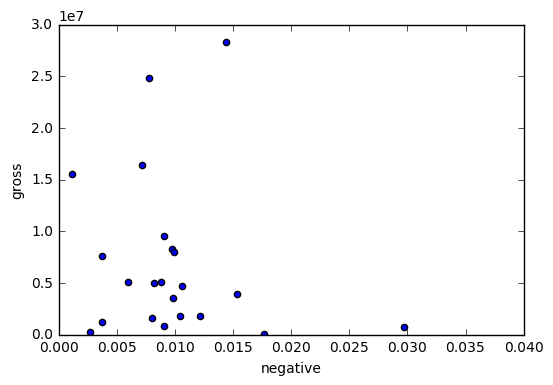

In [31]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 0.04, 0, 30000000])
plt.scatter(data['negative'], data['grossPerDay'])
plt.show()

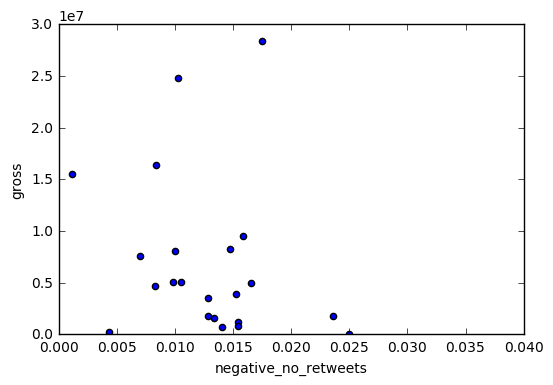

In [32]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 0.04, 0, 30000000])
plt.scatter(data['negative_no_retweets'], data['grossPerDay'])
plt.show()

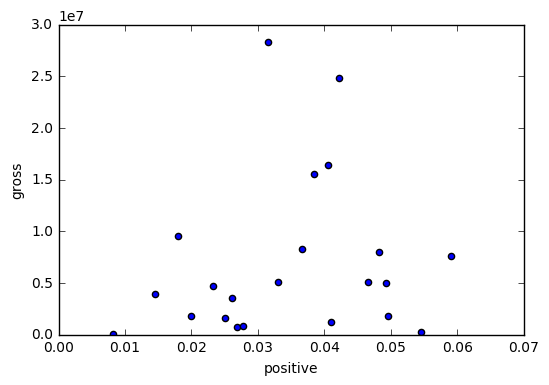

In [35]:
plt.ylabel('gross')
plt.xlabel('positive')
plt.axis([0, 0.07, 0, 30000000])
plt.scatter(data['positive'], data['grossPerDay'])
plt.show()

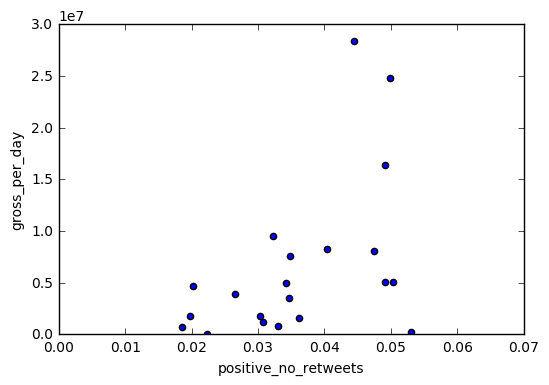

In [37]:
plt.ylabel('gross_per_day')
plt.xlabel('positive_no_retweets')
plt.axis([0, 0.07, 0, 30000000])
plt.scatter(data['positive_no_retweets'], data['grossPerDay'])
plt.show()

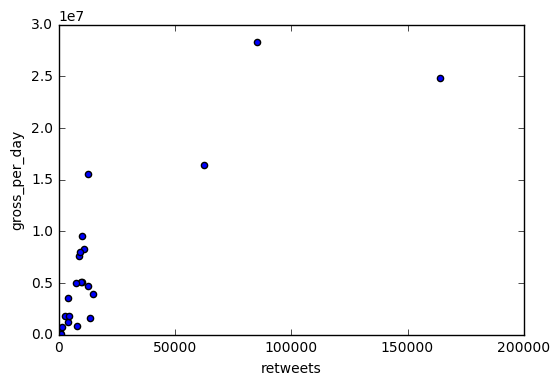

In [38]:
plt.ylabel('gross_per_day')
plt.xlabel('retweets')
plt.axis([0, 200000, 0, 30000000])
plt.scatter(data['retweets'], data['grossPerDay'])
plt.show()

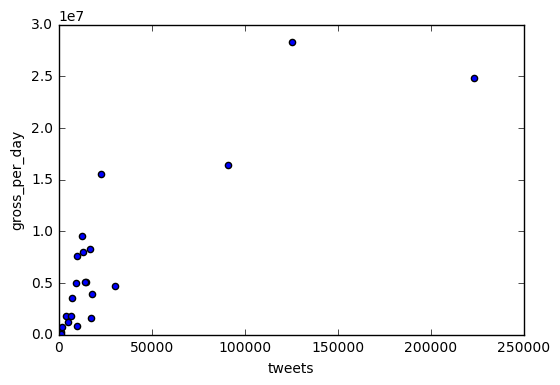

In [39]:
plt.ylabel('gross_per_day')
plt.xlabel('tweets')
plt.axis([0, 250000, 0, 30000000])
plt.scatter(data['tweets'], data['grossPerDay'])
plt.show()

In [15]:
data['percentretweets'] = data.retweets/data.tweets
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay,percentretweets
0,#PricelessTheMovie,975,511,3,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05,0.524103
1,#TheAccountant,16708,10957,3,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06,0.655794
2,#MadeaHalloween,12710,9847,3,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06,0.774744
3,#JackReacherMovie,10032,8783,3,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06,0.875498
4,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06,0.819451
5,#MaxSteel,1781,1301,3,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05,0.730488
6,#OuijaMovie,29983,12413,3,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06,0.414001
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06,0.679547
8,#DreamWorksTrolls,22481,12690,3,1.984609,0,0.001130,0.001138,0.038407,0.072036,46581142.0,1.552705e+07,0.564477
9,#HacksawRidge,14780,10091,3,1.949662,0,0.008849,0.010506,0.046558,0.050262,15190758.0,5.063586e+06,0.682747


In [16]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
#del data['gross']
del data['daysInTheater']
data.head(22)

,query,tweets,retweets,percentretweets,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay
0,#PricelessTheMovie,975,511,0.524103,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05
1,#TheAccountant,16708,10957,0.655794,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06
2,#MadeaHalloween,12710,9847,0.774744,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06
3,#JackReacherMovie,10032,8783,0.875498,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06
4,#KevinHartWhatNow,18045,14787,0.819451,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06
5,#MaxSteel,1781,1301,0.730488,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05
6,#OuijaMovie,29983,12413,0.414001,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06
8,#DreamWorksTrolls,22481,12690,0.564477,1.984609,0,0.001130,0.001138,0.038407,0.072036,46581142.0,1.552705e+07
9,#HacksawRidge,14780,10091,0.682747,1.949662,0,0.008849,0.010506,0.046558,0.050262,15190758.0,5.063586e+06


In [17]:
del data['query']

<h1 style="color:orange">Sklearn Stuff</h1>

In [18]:
total_data = data.values
f_col = ['tweets', 'positive_no_retweets']
X = data[f_col]
y = data[['gross']]
from sklearn import preprocessing
#data_to_scale = total_data[:,:12]
scaled_X = preprocessing.scale(X)
scaled_y = preprocessing.scale(y)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
X_train

array([[ 0.00417477, -1.3540168 ],
       [-0.44983014, -0.57100222],
       [-0.44204007, -0.23170333],
       [-0.38437413, -0.21964102],
       [ 1.86529885,  0.52031058],
       [-0.29190607,  0.97197446],
       [-0.22831968, -0.86875463],
       [-0.54506366, -1.48575437],
       [-0.23813516, -0.11295391],
       [-0.25435797,  0.21031396],
       [-0.33221965, -0.41972987],
       [-0.50414636, -1.39216144],
       [ 3.77259853,  0.94349784],
       [-0.39582552, -0.27114304],
       [-0.48815725, -0.53642253],
       [ 1.19488598,  0.87952189],
       [-0.30676562,  0.88486355],
       [-0.39064513, -0.36566671],
       [-0.14192788,  2.65655092]])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train, y_train)

print (clf.intercept_)
print (clf.coef_)

[ 24305972.93878438]
[[ 17416893.94670143   8556466.7171593 ]]


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [20]:
clf.predict(X_test)

array([[  4393779.38598498],
       [ 24716781.50767474],
       [ 25189847.75959664]])

In [21]:
y_test


,gross
12,44725.0
0,707021.0
14,24074047.0


<h1 style="color:red">Cross Validation</h1>

In [22]:
from sklearn.cross_validation import cross_val_score
X=data[f_col]
print (X.shape)
y=data['gross']
print (y.shape)

(22, 2)
(22,)


In [23]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, scaled_X, y, cv=21, scoring='mean_squared_error')
print(mse_list)

[ -2.84843129e+14  -2.41863463e+14  -8.28392541e+13  -7.83296256e+11
  -2.74223237e+10  -4.40167500e+11  -3.91784316e+12  -1.67149728e+14
  -1.05917374e+14  -8.82071239e+14  -4.76853904e+13  -2.12578714e+13
  -8.59582916e+13  -3.71032406e+12  -1.29148897e+14  -1.85790490e+14
  -1.57407019e+12  -7.09821978e+15  -2.39866692e+12  -2.40589969e+13
  -1.21859514e+15]


In [24]:
mse_list_positive = -mse_list

In [25]:
import numpy as np
rmse_list = np.sqrt(mse_list_positive)
print rmse_list

[ 16877296.26399455  15551960.0957408    9101607.22830261
    885040.25655571    165596.87108571    663451.20367623
   1979354.22679146  12928639.82352783  10291616.68806433
  29699684.15200979   6905460.91493298   4610625.91907805
   9271369.45624274   1926220.14730154  11364369.62342219
  13630498.54009058   1254619.53986854  84250933.43112114
   1548763.02867599   4904997.14012358  34908382.1027616 ]


In [26]:
print (rmse_list.mean())

12986689.8406
